In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out
DP_Leo_LTT_fit_weighted_data_Thiswork_K.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_K_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_b.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_b_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_e.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_e_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_interporate.out
DP_Leo_LTT_fit_weighted_data_Thiswork_interporate_K100.out


In [3]:
#Read data ---#1
Input = "2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0]
OC = Data[:,1]
OC_err = Data[:,2]

In [4]:
#t = T0_bjd + P0_day*Epoch
x = BJD_time
y = OC
dy = OC_err

len_x = len(x)
#print(len_x)
#print(x)

In [5]:
m = 0
c = 0
K = 33.7        #m/s
e = 0               #No-unit
b = 0.0005
w = -1.36     #rad

In [6]:
def LTT_fit(x,m,c,K,e,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [7]:
import scipy.optimize as optimization  
guess = (m,c,K,e,b,w)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params, params_covariance = optimization.curve_fit(LTT_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [8]:
m = params[0]
c = params[1]
K = params[2]
e = params[3]
b = params[4]
w = params[5]

dm = params_covariance[0,0]
dc = params_covariance[1,1]
dK = params_covariance[2,2]
de = params_covariance[3,3]
db = params_covariance[4,4]
dw = params_covariance[5,5]

ocfit = LTT_fit(x,*params)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [9]:
print("The Keplerian parameters (b = 0.0005 rad):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("e =", e, "+/-", de**0.5, "[days]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (b = 0.0005 rad):
m = 0.0006148077754996115 +/- 0.0004398518117357549 [s]
c = -39.27836968250542 +/- 19.735804363980765 [s]
K = 47.01369192315678 +/- 1.182379833905439 [s]
e = 0.13525377052641724 +/- 0.07845789520501215 [days]
b = 0.0005111664682947285 +/- 1.5420755195245228e-05 [rad]
w = -5.919757329295307 +/- 0.7455696722034713 [rad]
w_deg = -339.177110710257 +/- 42.71799555021115 [deg]
Pc = 12291.85734373489 +/- 70.28844753146117 [days]
Pc_yr = 33.653271303860066 +/- 0.19243928140030436 [years]
Semi-major axis = 10.423610894628863 +/- 0.03973684404599882 [AU]
Mass sin(i)Mp= 5.289844305623588 +/- 0.1576868787554597 [MJ]


In [10]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = LTT_fit(x_line, *params) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 6
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq)

[ -1.95878988  14.24895205  29.01263133  32.10979527  23.62593969
  19.18033847  10.51003788 -47.70245027 -50.50008509 -27.31987744
 -26.92082105 -26.37317709 -25.83564317 -23.22259063 -22.75641543
 -21.80333875 -21.07279305 -18.18480292  10.00752923  18.11863342
  30.35575739  31.42301298  31.42301298  41.70055985  44.42254774]
Reduced_chisq: 0.8097322295532281


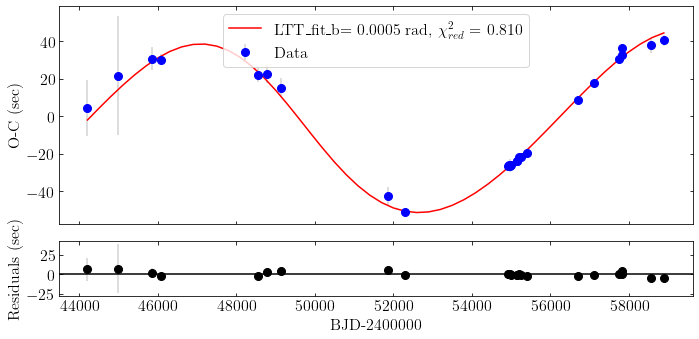

In [11]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
ax0.plot(x_line, y_line, '-', color='red',label='LTT\_fit\_b= 0.0005 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.set_ylabel('O-C (sec)')
ax0.legend(loc="best")

Residual = y-ocfit

ax1.set_ylabel('Residuals (sec)')
ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#ax1.legend(loc="best")
#plt.savefig("DP_Leo_LTT_fit_weighted_data_Thiswork_K_Res.jpg", dpi=1000)
plt.show()

#### The changing parameters: b = 0.0001 rad

In [12]:
m = 0
c = 0
K = 33.7        #m/s
e = 0               #No-unit
b = 0.0001
w = -1.36     #rad

In [13]:
def LTT_fit_b0p0001(x,m,c,e,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [14]:
import scipy.optimize as optimization  
guess = (m,c,K,e,w)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params_b0p0001, params_covariance_b0p0001 = optimization.curve_fit(LTT_fit_b0p0001, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [15]:
m = params_b0p0001[0]
c = params_b0p0001[1]
K = params_b0p0001[2]
e = params_b0p0001[3]
w = params_b0p0001[4]

dm = params_covariance_b0p0001[0,0]
dc = params_covariance_b0p0001[1,1]
dK = params_covariance_b0p0001[2,2]
de = params_covariance_b0p0001[3,3]
dw = params_covariance_b0p0001[4,4]

ocfit = LTT_fit_b0p0001(x,*params_b0p0001)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [16]:
print("The Keplerian parameters (b = 0.0001 rad):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[days]")
print("e =", e, "+/-", de**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (b = 0.0001 rad):
m = 0.00463899661107019 +/- 3.784127123056962 [s]
c = -629.0818059243824 +/- nan [s]
K = 11.905867558377148 +/- nan [days]
e = 5.89673434028486e-08 +/- 0.00761586366335107 [rad]
w = -1.3612921576865407 +/- 184294.58307406548 [rad]
w_deg = -77.99629531969613 +/- 10559301.797267089 [deg]
Pc = 62831.85307179586 +/- 9387.955499261121 [days]
Pc_yr = 172.0242383895848 +/- 25.7028213532132 [years]
Semi-major axis = 30.93093838319925 +/- 3.0810091686038796 [AU]
Mass sin(i)Mp= 2.329036083790249 +/- 53413120646.475555 [MJ]


/var/folders/40/qs1cq6qj3mn08n4rf87fxb6m0000gn/T/ipykernel_3371/2225819385.py:3: RuntimeWarning: invalid value encountered in double_scalars
  print("c =", c, "+/-", dc**0.5, "[s]")
/var/folders/40/qs1cq6qj3mn08n4rf87fxb6m0000gn/T/ipykernel_3371/2225819385.py:4: RuntimeWarning: invalid value encountered in double_scalars
  print("K =", K, "+/-", dK**0.5, "[days]")


In [17]:
x_min, x_max = np.amin(x), np.amax(x)
x_line_b0p0001 = np.linspace(x_min, x_max)
y_line_b0p0001 = LTT_fit_b0p0001(x_line_b0p0001, *params_b0p0001) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq_b0p0001 = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_b0p0001)

[-297.03612342 -293.42434094 -289.44566587 -288.35327698 -276.88223966
 -275.89374851 -274.17762649 -261.53113215 -259.61184609 -247.39203243
 -247.29215392 -247.15593147 -247.02313969 -246.38940244 -246.27822053
 -246.05251464 -245.88088953 -245.2129301  -239.08069789 -237.27795909
 -234.27488901 -233.98265068 -233.98265068 -230.50500116 -229.00664755]
Reduced_chisq: 19358.73611496005


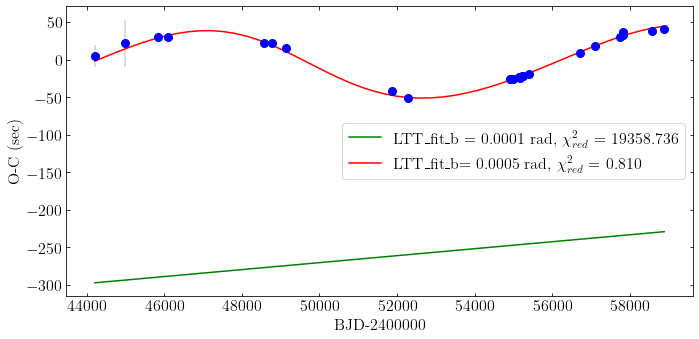

In [18]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line_b0p0001,y_line_b0p0001,'-g',label='LTT\_fit\_b = 0.0001 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_b0p0001)))
plt.plot(x_line, y_line, '-', color='red',label='LTT\_fit\_b= 0.0005 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.legend(loc="best")
plt.show()

#### The changing parameters: b = 0.0007

In [19]:
m = 0
c = 0
K = 33.7        #m/s
e = 0               #No-unit
b = 0.0007
w = -1.36     #rad

In [20]:
def LTT_fit_b0p0007(x,m,c,e,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [21]:
import scipy.optimize as optimization  
guess = (m,c,K,e,w)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params_b0p0007, params_covariance_b0p0007 = optimization.curve_fit(LTT_fit_b0p0007, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [22]:
m = params_b0p0007[0]
c = params_b0p0007[1]
K = params_b0p0007[2]
e = params_b0p0007[3]
w = params_b0p0007[4]

dm = params_covariance_b0p0007[0,0]
dc = params_covariance_b0p0007[1,1]
dK = params_covariance_b0p0007[2,2]
de = params_covariance_b0p0007[3,3]
dw = params_covariance_b0p0007[4,4]

ocfit = LTT_fit_b0p0007(x,*params_b0p0007)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [23]:
print("The Keplerian parameters (b = 0.0007 rad):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[days]")
print("e =", e, "+/-", de**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (b = 0.0007 rad):
m = 0.00463899661107019 +/- 3.784127123056962 [s]
c = -629.0818059243824 +/- nan [s]
K = 11.905867558377148 +/- nan [days]
e = 5.89673434028486e-08 +/- 0.00761586366335107 [rad]
w = -1.3612921576865407 +/- 184294.58307406548 [rad]
w_deg = -77.99629531969613 +/- 10559301.797267089 [deg]
Pc = 8975.979010256551 +/- 27.37013265090706 [days]
Pc_yr = 24.57489119851212 +/- 0.07493533922219592 [years]
Semi-major axis = 8.452679506519035 +/- 0.01718296942574343 [AU]
Mass sin(i)Mp= 1.2175221486090282 +/- 27922133910.256268 [MJ]


/var/folders/40/qs1cq6qj3mn08n4rf87fxb6m0000gn/T/ipykernel_3371/2949562705.py:3: RuntimeWarning: invalid value encountered in double_scalars
  print("c =", c, "+/-", dc**0.5, "[s]")
/var/folders/40/qs1cq6qj3mn08n4rf87fxb6m0000gn/T/ipykernel_3371/2949562705.py:4: RuntimeWarning: invalid value encountered in double_scalars
  print("K =", K, "+/-", dK**0.5, "[days]")


In [24]:
x_min, x_max = np.amin(x), np.amax(x)
x_line_b0p0007 = np.linspace(x_min, x_max)
y_line_b0p0007 = LTT_fit_b0p0007(x_line_b0p0007, *params_b0p0007) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq_b0p0007 = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_b0p0007)

[-297.03612342 -293.42434094 -289.44566587 -288.35327698 -276.88223966
 -275.89374851 -274.17762649 -261.53113215 -259.61184609 -247.39203243
 -247.29215392 -247.15593147 -247.02313969 -246.38940244 -246.27822053
 -246.05251464 -245.88088953 -245.2129301  -239.08069789 -237.27795909
 -234.27488901 -233.98265068 -233.98265068 -230.50500116 -229.00664755]
Reduced_chisq: 19358.73611496005


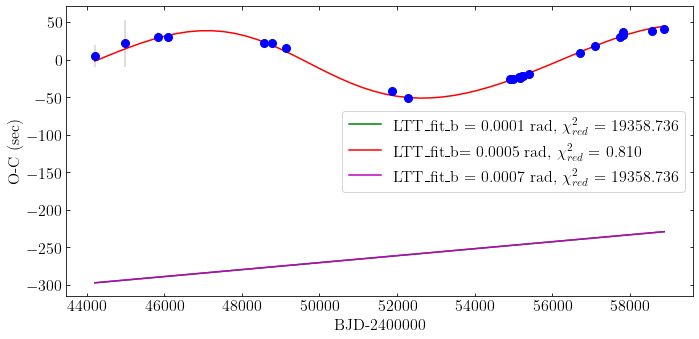

In [25]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line_b0p0001,y_line_b0p0001,'-g',label='LTT\_fit\_b = 0.0001 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_b0p0001)))
plt.plot(x_line, y_line, '-', color='red',label='LTT\_fit\_b= 0.0005 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
plt.plot(x_line_b0p0007,y_line_b0p0007,'-m',label='LTT\_fit\_b = 0.0007 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_b0p0007)))
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.legend(loc="best")
plt.show()

#### The changing parameters: b = 0.001

In [26]:
m = 0
c = 0
K = 33.7        #m/s
e = 0               #No-unit
b = 0.001
w = -1.36     #rad

In [27]:
def LTT_fit_b0p001(x,m,c,e,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [28]:
import scipy.optimize as optimization  
guess = (m,c,K,e,w)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params_b0p001, params_covariance_b0p001 = optimization.curve_fit(LTT_fit_b0p001, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [29]:
m = params_b0p001[0]
c = params_b0p001[1]
K = params_b0p001[2]
e = params_b0p001[3]
w = params_b0p001[4]

dm = params_covariance_b0p001[0,0]
dc = params_covariance_b0p001[1,1]
dK = params_covariance_b0p001[2,2]
de = params_covariance_b0p001[3,3]
dw = params_covariance_b0p001[4,4]

ocfit = LTT_fit_b0p001(x,*params_b0p001)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [30]:
print("The Keplerian parameters (b = 0.001 rad):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[days]")
print("e =", e, "+/-", de**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (b = 0.001 rad):
m = 0.00463899661107019 +/- 3.784127123056962 [s]
c = -629.0818059243824 +/- nan [s]
K = 11.905867558377148 +/- nan [days]
e = 5.89673434028486e-08 +/- 0.00761586366335107 [rad]
w = -1.3612921576865407 +/- 184294.58307406548 [rad]
w_deg = -77.99629531969613 +/- 10559301.797267089 [deg]
Pc = 6283.185307179586 +/- 9.387955499261121 [days]
Pc_yr = 17.202423838958484 +/- 0.0257028213532132 [years]
Semi-major axis = 6.663868664800319 +/- 0.006637833033146492 [AU]
Mass sin(i)Mp= 1.0810427879602054 +/- 24792174436.109306 [MJ]


/var/folders/40/qs1cq6qj3mn08n4rf87fxb6m0000gn/T/ipykernel_3371/8007321.py:3: RuntimeWarning: invalid value encountered in double_scalars
  print("c =", c, "+/-", dc**0.5, "[s]")
/var/folders/40/qs1cq6qj3mn08n4rf87fxb6m0000gn/T/ipykernel_3371/8007321.py:4: RuntimeWarning: invalid value encountered in double_scalars
  print("K =", K, "+/-", dK**0.5, "[days]")


In [31]:
x_min, x_max = np.amin(x), np.amax(x)
x_line_b0p001 = np.linspace(x_min, x_max)
y_line_b0p001 = LTT_fit_b0p001(x_line_b0p001, *params_b0p001) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq_b0p001 = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_b0p001)

[-297.03612342 -293.42434094 -289.44566587 -288.35327698 -276.88223966
 -275.89374851 -274.17762649 -261.53113215 -259.61184609 -247.39203243
 -247.29215392 -247.15593147 -247.02313969 -246.38940244 -246.27822053
 -246.05251464 -245.88088953 -245.2129301  -239.08069789 -237.27795909
 -234.27488901 -233.98265068 -233.98265068 -230.50500116 -229.00664755]
Reduced_chisq: 19358.73611496005


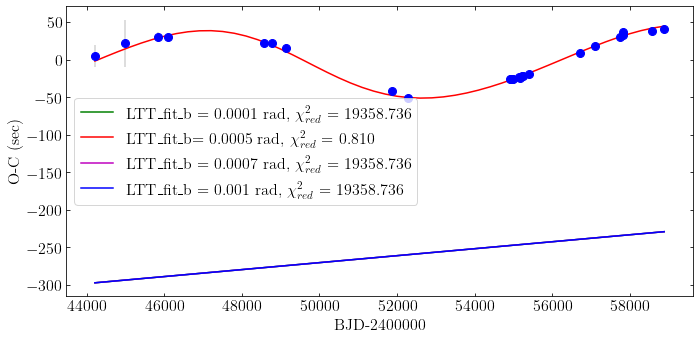

In [32]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line_b0p0001,y_line_b0p0001,'-g',label='LTT\_fit\_b = 0.0001 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_b0p0001)))
plt.plot(x_line, y_line, '-', color='red',label='LTT\_fit\_b= 0.0005 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
plt.plot(x_line_b0p0007,y_line_b0p0007,'-m',label='LTT\_fit\_b = 0.0007 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_b0p0007)))
plt.plot(x_line_b0p001, y_line_b0p001,'-b',label='LTT\_fit\_b = 0.001 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_b0p001)))
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.legend(loc="best")
plt.savefig("DP_Leo_LTT_fit_weighted_data_Thiswork_b_Res.jpg", dpi=1000)
plt.show()